In [1]:
import dynamo as dyn
dyn.configuration.set_figure_params('dynamo', background='white') # jupter notebooks

In [2]:
data_dir = '../../data/emt_sim/'
adata = dyn.read(data_dir+'emt_circuit_larger_noise.h5ad')

In [3]:
dyn.pp.recipe_monocle(adata)
dyn.tl.dynamics(adata)

|-----? dynamo.preprocessing.deprecated is deprecated.
|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----? dynamo detects your data is size factor normalized and/or log transformed. If this is not right, plese set `normalized = False.
|-----> filtering cells...
|-----> 5000 cells passed basic filters.
|-----> filtering gene...
|-----> 9 genes passed basic filters.
|-----> calculating size factor...

d:\Anaconda\envs\celldancer\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: recipe_monocle is deprecated and will be removed in a future release. Please update your code to use the new replacement function.
  """Entry point for launching an IPython kernel.


|-----> [moments calculation] completed [40.8297s]


estimating gamma: 100%|██████████| 9/9 [00:00<00:00, 228.40it/s]


AnnData object with n_obs × n_vars = 5000 × 9
    obs: 'tgf', 'leiden', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr'
    var: 'highly_variable', 'velocity_gamma', 'nCells', 'nCounts', 'pass_basic_filter', 'frac', 'use_for_pca', 'ntr', 'use_for_dynamics'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'umap', 'pp', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'vel_params_names', 'dynamics'
    obsm: 'X_umap', 'X_pca', 'X'
    varm: 'vel_params'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'connectivities', 'distances', 'moments_con'

In [4]:
dyn.tl.reduceDimension(adata, basis='umap')

|-----> retrieve data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> [UMAP] completed [0.0020s]
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> [UMAP] completed [0.0020s]


In [5]:
dyn.tl.cell_velocities(adata)
dyn.vf.VectorField(adata,layer = 'spliced',basis='umap')
dyn.vf.topography(adata,basis='umap')

|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 14.2400%

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\dynamo\tools\utils.py:2605: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all(vel_params_df.gamma_r2.values is None) or np.all(vel_params_df.gamma_r2.values == ""):


|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%|-----> [calculating transition matrix via pearson kernel with sqrt transform.] completed [1.2615s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [1.1586s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: UMAP. 
        Vector field will be learned in the UMAP space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> [SparseVFC] completed [5.2312s]
|-----> [V

d:\Anaconda\envs\celldancer\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
d:\Anaconda\envs\celldancer\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected


AnnData object with n_obs × n_vars = 5000 × 9
    obs: 'tgf', 'leiden', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'control_point_umap', 'inlier_prob_umap', 'obs_vf_angle_umap'
    var: 'highly_variable', 'velocity_gamma', 'nCells', 'nCounts', 'pass_basic_filter', 'frac', 'use_for_pca', 'ntr', 'use_for_dynamics', 'use_for_transition'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'umap', 'pp', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'vel_params_names', 'dynamics', 'grid_velocity_umap', 'VecFld_umap'
    obsm: 'X_umap', 'X_pca', 'X', 'velocity_umap', 'velocity_umap_SparseVFC', 'X_umap_SparseVFC'
    varm: 'vel_params'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'connectivities', 'distances', 'moments_con', 'pe

|-----> X shape: (5000, 2) V shape: (5000, 2)
|-----------> plotting with basis key=X_umap
|-----------> skip filtering leiden by stack threshold when stacking color because it is not a numeric type


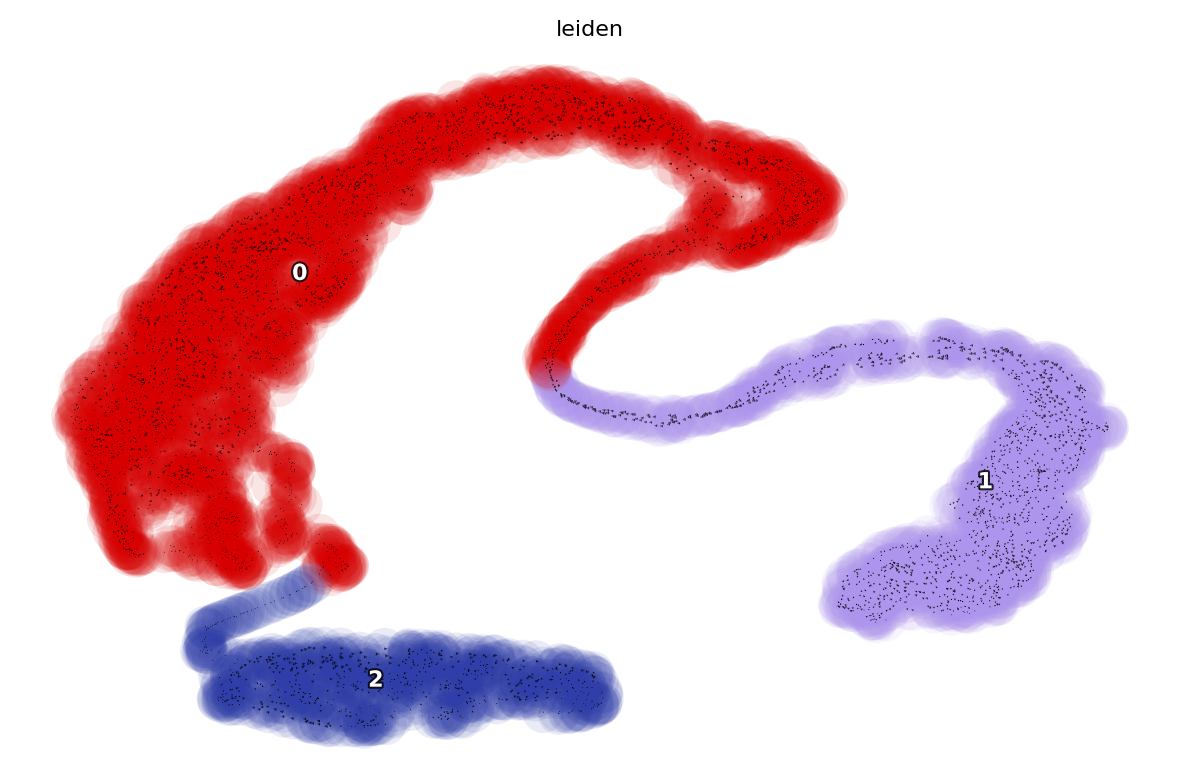

|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap
|-----------> skip filtering leiden by stack threshold when stacking color because it is not a numeric type


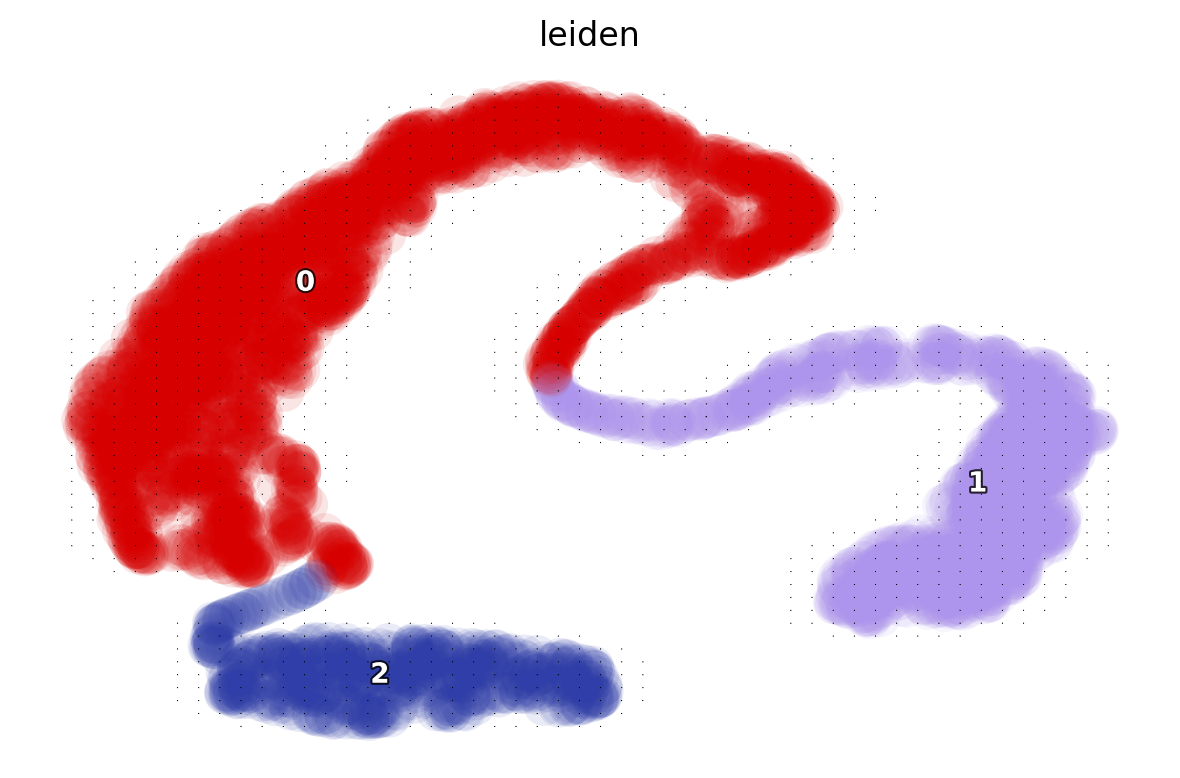

|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap
|-----------> skip filtering leiden by stack threshold when stacking color because it is not a numeric type


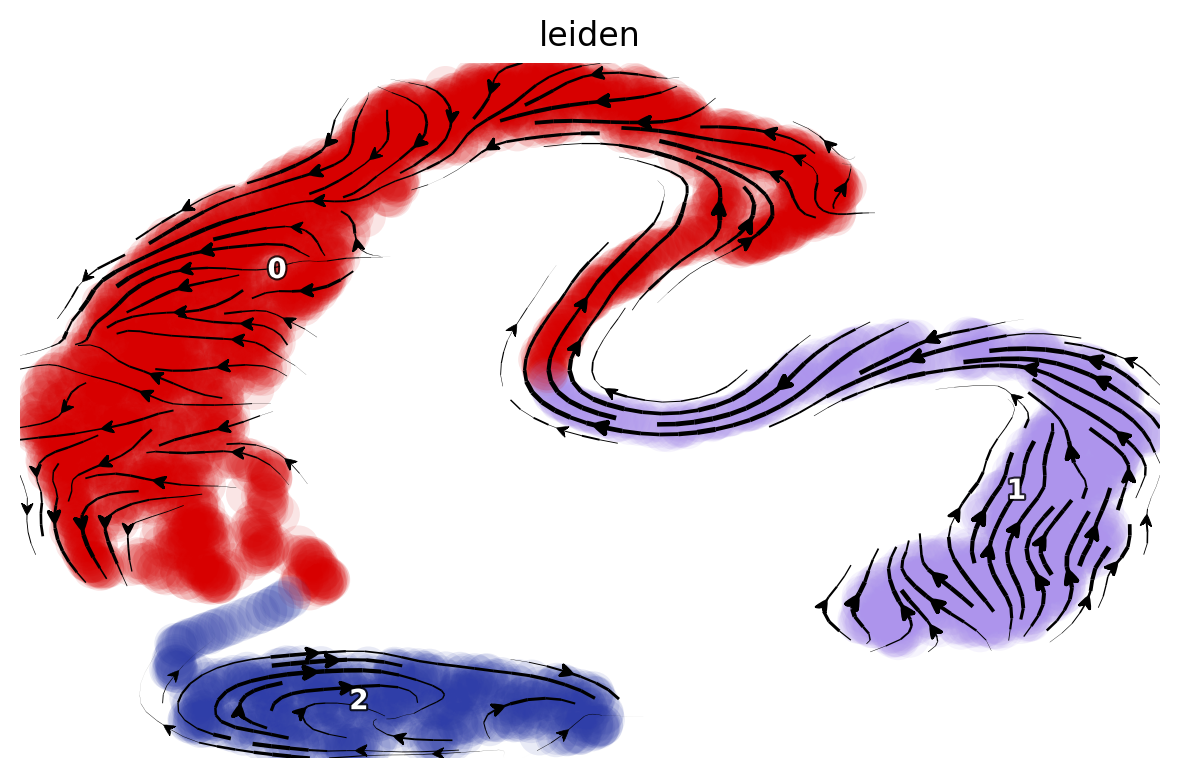

In [6]:
%matplotlib inline
dyn.configuration.set_figure_params('dynamo', background='white') # jupter notebooks
colors = 'leiden'
dyn.pl.cell_wise_vectors(adata, color=colors, ncols=3)
dyn.pl.grid_vectors(adata, color=colors, ncols=3)
dyn.pl.streamline_plot(adata, color=colors, ncols=3)

|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: UMAP. 
        Vector field will be learned in the UMAP space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> [SparseVFC] completed [3.3576s]
|-----> [VectorField] completed [3.5584s]
|-----> Vector field for umap is but its topography is not mapped. Mapping topography now ...
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\dynamo\plot\topography.py:561: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker (<matplotlib.markers.MarkerStyle object at 0x0000020A718CCC88>).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  zorder=5,
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\dynamo\plot\topography.py:561: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker (<matplotlib.markers.MarkerStyle object at 0x0000020A72E644C8>).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  zorder=5,
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\dynamo\plot\topography.py:561: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker (<matplotlib.markers.MarkerStyle object at 0x0000020A730EE208>).  Matplotlib is ignoring the e

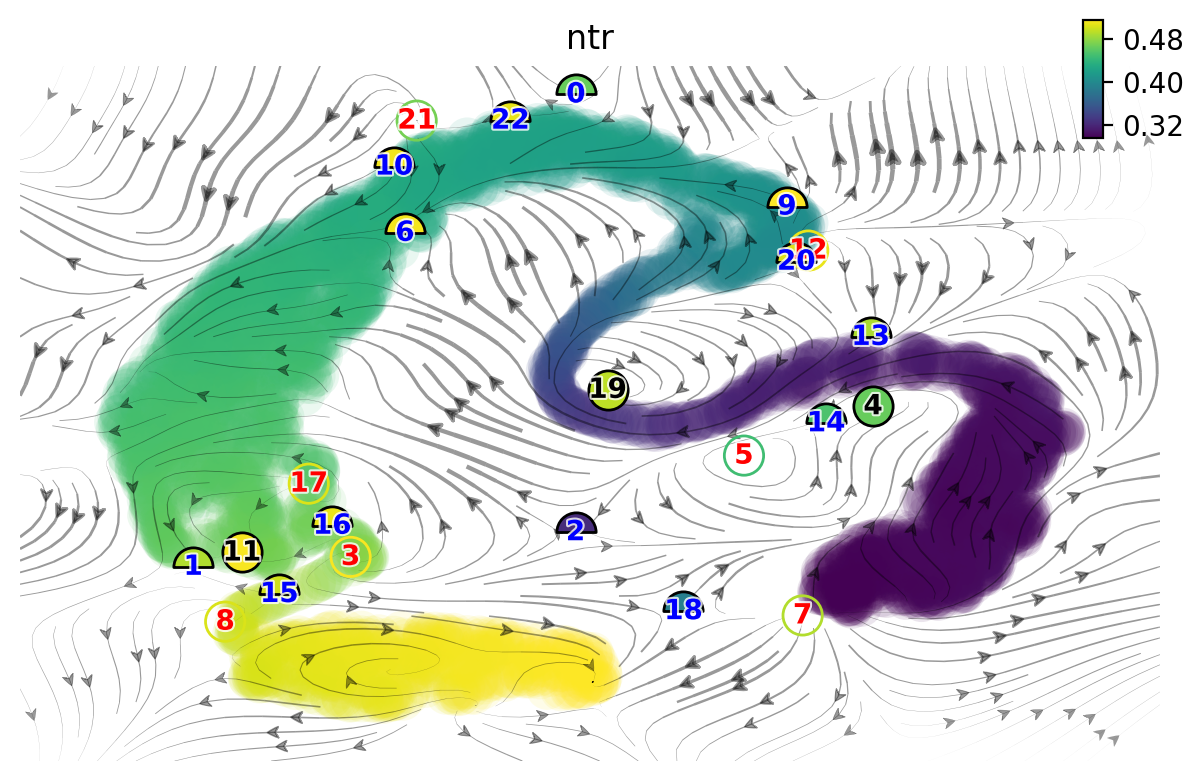

In [7]:
dyn.vf.VectorField(adata, basis='umap')
dyn.pl.topography(adata)